# 1、EDA

In [1]:
import pandas as pd

# Load the CSV file
file_path = 'data\\raw\\housing.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# 数据基本信息
data.info()
# 描述性统计
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19195 entries, 0 to 19194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19195 non-null  float64
 1   latitude            19195 non-null  float64
 2   housing_median_age  19195 non-null  float64
 3   total_rooms         19195 non-null  float64
 4   total_bedrooms      19006 non-null  float64
 5   population          19195 non-null  float64
 6   households          19195 non-null  float64
 7   median_income       19195 non-null  float64
 8   median_house_value  19195 non-null  float64
 9   ocean_proximity     19195 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19195.000000,19195.000000,19195.000000,19195.000000,19006.000000,19195.000000,19195.000000,19195.000000,19195.000000
mean,-119.571967,35.634825,28.619745,2627.138421,535.979901,1421.067413,497.835530,3.876270,207062.917843
std,2.004638,2.136828,12.573811,2163.509711,418.839228,1129.249021,380.143585,1.911459,115668.000617
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,2.562500,119400.000000
50%,-118.500000,34.260000,29.000000,2122.000000,434.000000,1165.000000,409.000000,3.537900,179800.000000
75%,-118.010000,37.710000,37.000000,3142.000000,644.000000,1721.000000,602.000000,4.757150,265400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# 检查缺失值
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

total_bedrooms    189
dtype: int64

In [5]:
# 线性填充缺失值
data['total_bedrooms'] = data['total_bedrooms'].interpolate(method='linear')

# 检查填充后的缺失值情况
missing_values_after = data.isnull().sum()
missing_values_after[missing_values_after > 0]


Series([], dtype: int64)

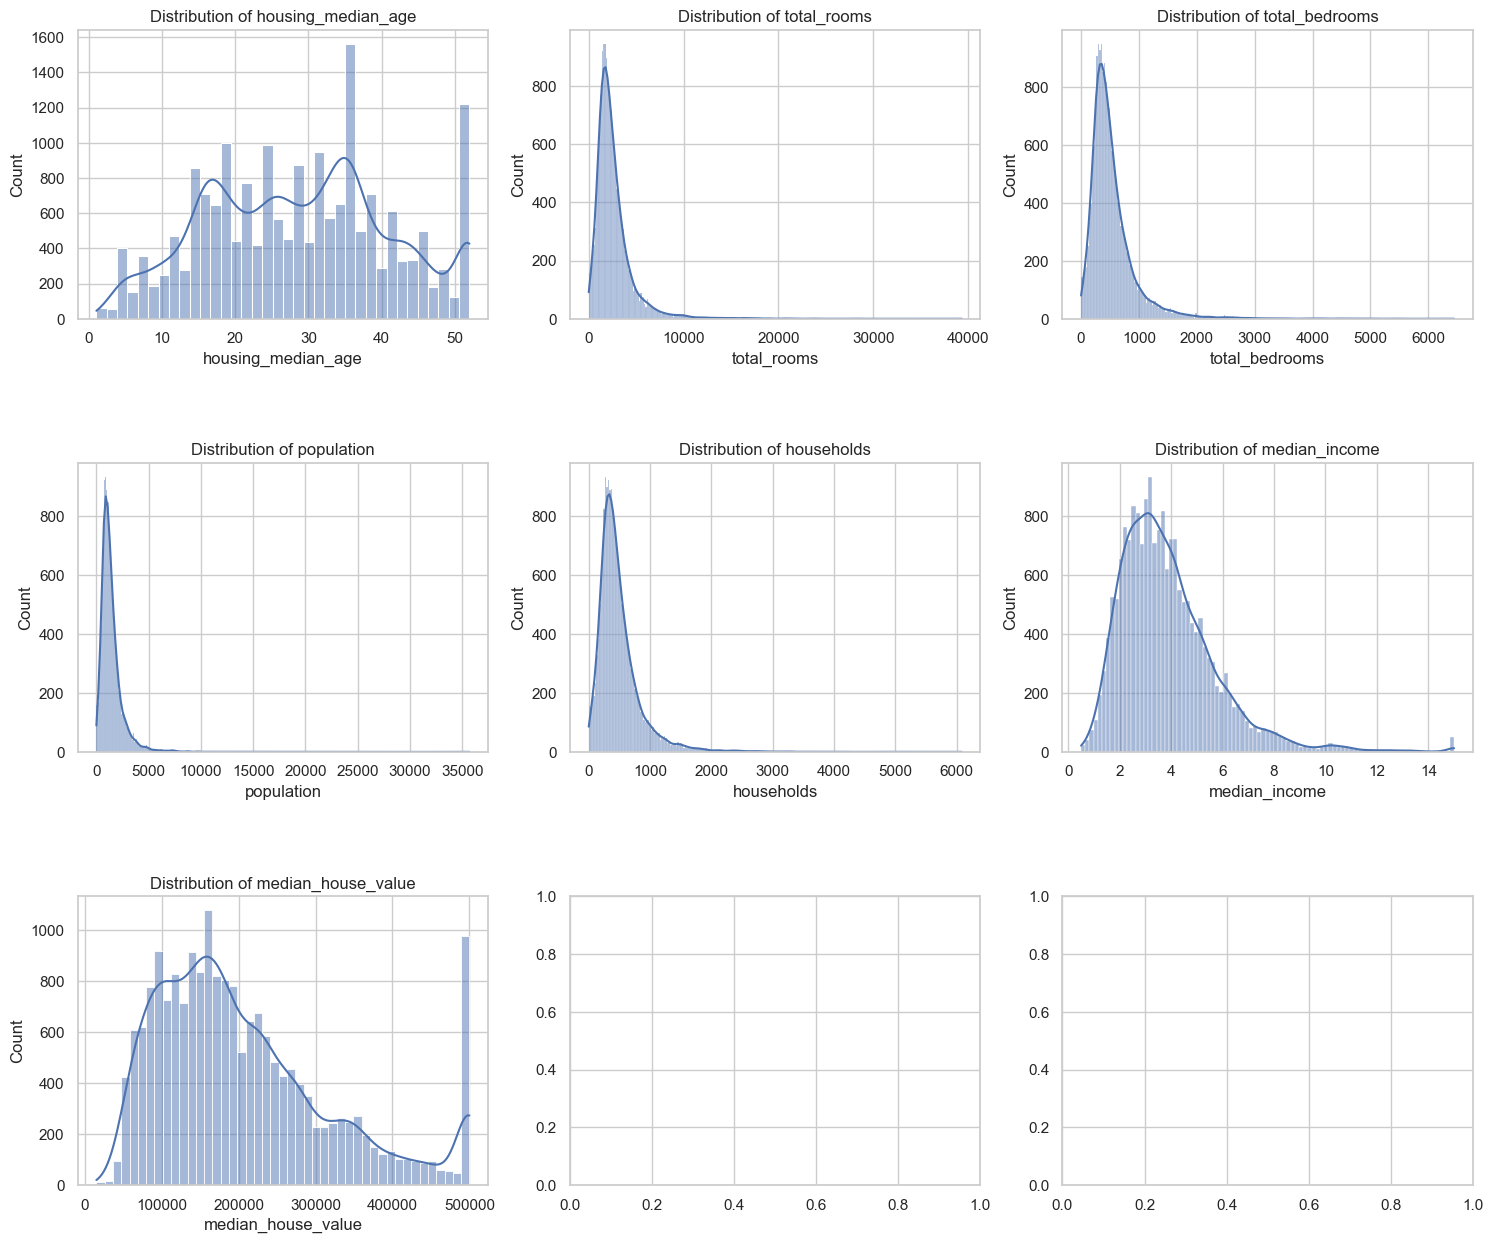

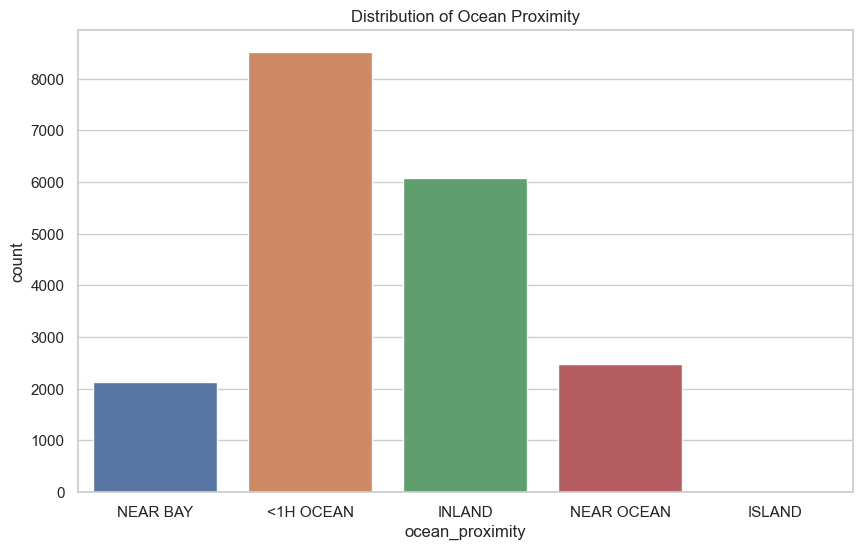

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 连续变量的分布情况
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.subplots_adjust(hspace=0.5)

continuous_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
                       'population', 'households', 'median_income', 'median_house_value']

for i, feature in enumerate(continuous_features):
    row, col = divmod(i, 3)
    sns.histplot(data[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Distribution of {feature}')

plt.show()

# 类别变量的分布情况
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=data)
plt.title('Distribution of Ocean Proximity')
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder

# 初始化编码器
label_encoder = LabelEncoder()

# 对ocean_proximity进行编码
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

# 显示前几行编码后的数据
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


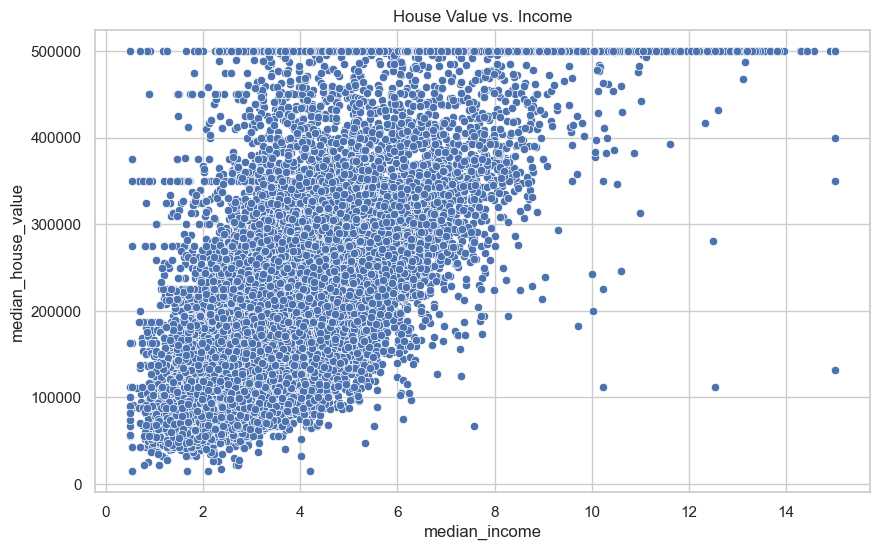

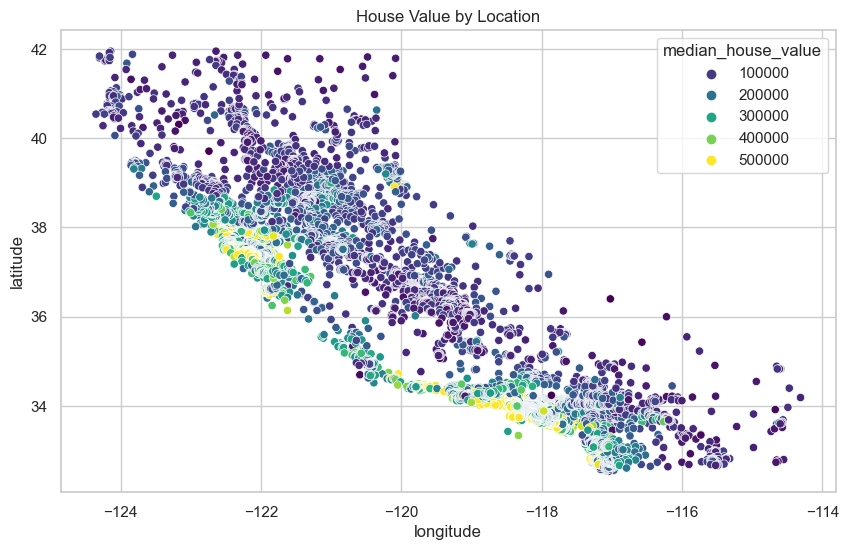

In [10]:
# 房价与收入的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('House Value vs. Income')
plt.show()

# 地理位置与房价的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', palette='viridis', data=data)
plt.title('House Value by Location')
plt.show()


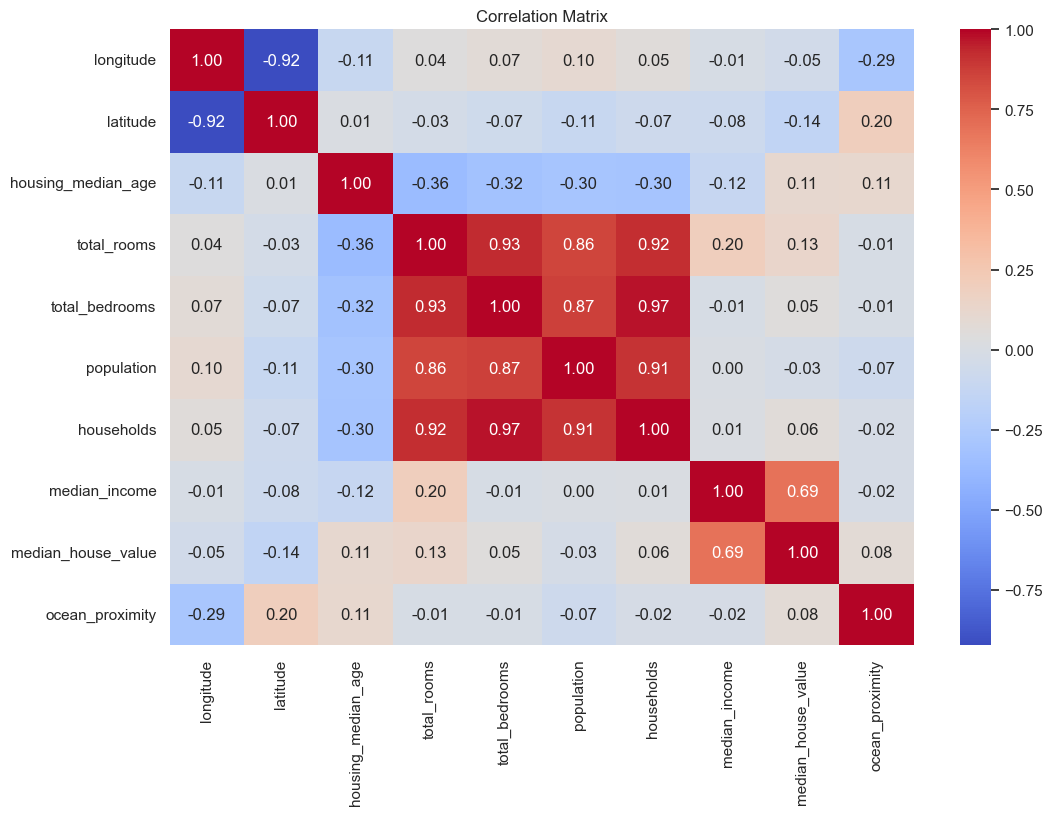

In [11]:
# 计算相关性矩阵
correlation_matrix = data.corr()

# 相关性热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [14]:
correlation_matrix = data.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924364,-0.109431,0.043177,0.069165,0.098775,0.053737,-0.013059,-0.045601,-0.290245
latitude,-0.924364,1.000000,0.011599,-0.034374,-0.065969,-0.107466,-0.069278,-0.082399,-0.144646,0.201164
housing_median_age,-0.109431,0.011599,1.000000,-0.362835,-0.320181,-0.296763,-0.303161,-0.116515,0.106521,0.114184
total_rooms,0.043177,-0.034374,-0.362835,1.000000,0.926329,0.855394,0.917989,0.196085,0.132531,-0.014083
total_bedrooms,0.069165,-0.065969,-0.320181,0.926329,1.000000,0.872106,0.973750,-0.009673,0.047773,-0.012742
population,0.098775,-0.107466,-0.296763,0.855394,0.872106,1.000000,0.906252,0.000940,-0.027498,-0.068761
households,0.053737,-0.069278,-0.303161,0.917989,0.973750,0.906252,1.000000,0.010310,0.063839,-0.016197
median_income,-0.013059,-0.082399,-0.116515,0.196085,-0.009673,0.000940,0.010310,1.000000,0.688830,-0.015425
median_house_value,-0.045601,-0.144646,0.106521,0.132531,0.047773,-0.027498,0.063839,0.688830,1.000000,0.081156
ocean_proximity,-0.290245,0.201164,0.114184,-0.014083,-0.012742,-0.068761,-0.016197,-0.015425,0.081156,1.000000


In [12]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 准备特征和目标变量
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# 初始化随机森林回归器
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X, y)

# 获取特征重要性
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
7,median_income,0.514721
8,ocean_proximity,0.111014
1,latitude,0.110985
0,longitude,0.109425
2,housing_median_age,0.053787
5,population,0.032995
3,total_rooms,0.024811
4,total_bedrooms,0.023147
6,households,0.019117


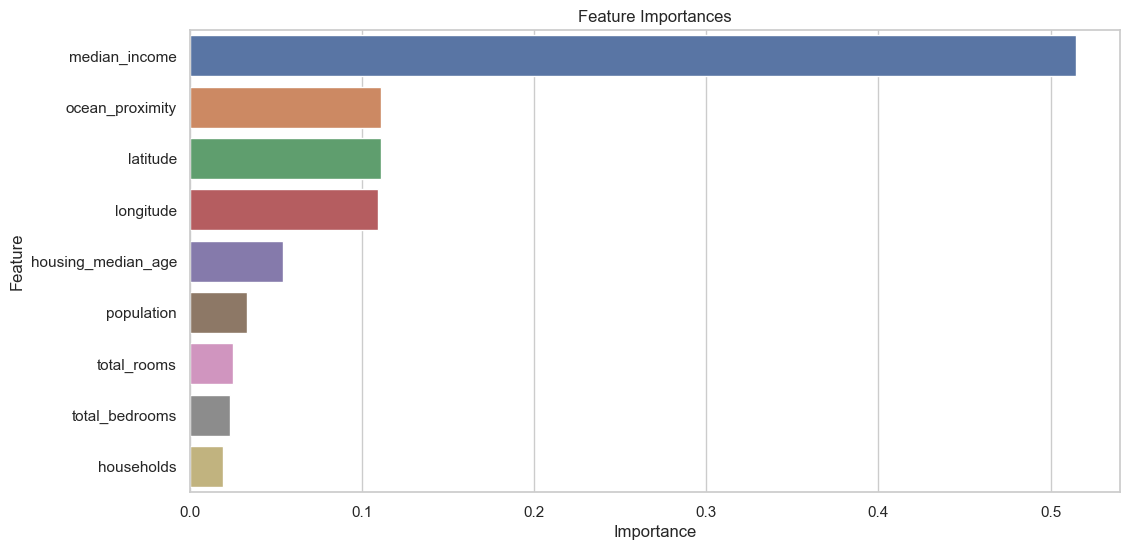

In [16]:
# 可视化特征重要性
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()
